<a href="https://colab.research.google.com/github/Sharon-Faith/spam_titanic_proj/blob/main/spam_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### a) Specifying the Question

The purpose of the study to create a model that will be able to determine whether or not an email is spam using the information in the dataset found [here](https://archive.ics.uci.edu/ml/datasets/Spambase).

### b) Defining the Metric for Success

* Creating a model that will be able to determine whether or not an email is spam.


### c) Understanding the context 

Spam, also known as junk mail, refers to emails that are unsolicited and sent in bulk to a large list of recipients. They can be sent by humans directly, but more often by bots. They are mostly commercial in nature eg advertisements for products/web sites, but also include make money fast schemes, chain letters etc. There are words and characters that are common in spam and these may be flagged and aid in identifying spam mails so that they go to the junk folder as opposed to the primary inbox folder. In detecting spam, false positives are more detrimental than false negatives (precision) because they can result in important emails not being seen.

### d) Recording the Experimental Design

*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify missing values, and determine how deal with them, drop any unnecessary columns etc.
*   Exploratory analysis
*   Implement the solution through modelling.
*   Challenge the solution.
*   Conclusion and recommendations

### e) Data Relevance

The dataset provided ([here](https://archive.ics.uci.edu/ml/datasets/Spambase)) is relevant to the research question. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mails that were considered spam or not.The run-length attributes measure the length of sequences of consecutive capital letters. These characteristics will aid in identifying spam email.

## Reading the Data

In [87]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [88]:
# Loading the Dataset
# 
cols = np.arange(58)
df = pd.read_csv('spambase.csv', names = cols)

## Checking the Data

In [89]:
# Determining the no. of records in our dataset
#
df.shape

(4601, 58)

In [90]:
# Previewing the top of our dataset
#
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [91]:
# Previewing the bottom of our dataset
# 
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [92]:
# Checking datatype of each column
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

## Tidying the Dataset

In [93]:
# dropping unnecessary columns
# all columns are necessary because they represent imporant words and characteristics
#that will help in identifying spam

In [94]:
#checking for missing values
df.isnull().sum()
#no null values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

In [95]:
#58 columns:
#Attribute columns:
# 48 real attributes of type word_freq_WORD = percentage of words in the e-mail
#  that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

# 6 real attributes of type char_freq_CHAR] = percentage of characters in the e-mail 
# that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

# 1 real attribute of type capital_run_length_average = average length of uninterrupted
#  sequences of capital letters

# 1 integer attribute of type capital_run_length_longest = length of longest
#  uninterrupted sequence of capital letters

# 1 integer attribute of type capital_run_length_total = sum of length 
# of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

#Target column
# 1 nominal {0,1} class attribute of type spam
# = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.




In [96]:
#checking for duplicates
df.duplicated().sum()
#wont drop duplicates. It is possible for different emails to have the same general characteristics above

391

## Univariate Analysis

In [97]:
#Attribute columns:
# 48 real attributes of type word_freq_WORD = percentage of words in the e-mail
#  that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

# 6 real attributes of type char_freq_CHAR] = percentage of characters in the e-mail 
# that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

# 1 real attribute of type capital_run_length_average = average length of uninterrupted
#  sequences of capital letters

# 1 integer attribute of type capital_run_length_longest = length of longest
#  uninterrupted sequence of capital letters

# 1 integer attribute of type capital_run_length_total = sum of length 
# of uninterrupted sequences of capital letters = total number of capital letters in the e-mail


In [98]:
for col in df.columns[0:57]:
  print(df[col].describe())
  print('**************************')

count    4601.000000
mean        0.104553
std         0.305358
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.540000
Name: 0, dtype: float64
**************************
count    4601.000000
mean        0.213015
std         1.290575
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: 1, dtype: float64
**************************
count    4601.000000
mean        0.280656
std         0.504143
min         0.000000
25%         0.000000
50%         0.000000
75%         0.420000
max         5.100000
Name: 2, dtype: float64
**************************
count    4601.000000
mean        0.065425
std         1.395151
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        42.810000
Name: 3, dtype: float64
**************************
count    4601.000000
mean        0.312223
std         0.672513
min         0.000000
25%         0.000000
50%         0.00000

## Modelling (Naive-Bayes Classifier)

### Data Preparation Summary

Cleaning/Preparation summary:
* No columns were dropped - all columns are necessary because they represent percentages/lengths important words and characteristics that will help in identifying spam
* Missing values were checked for and and none were found.
* Some duplicates were found and weren't dropped because it is possible for different emails to have the same general attributes that the columns represented.

In [99]:
accuracies = []

### 80-20 split

In [100]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [101]:
# separating features and label

# 
X = df.drop(57, axis=1)
y = df[57]

Accuracy score:  0.8121606948968513
[[454  84]
 [ 89 294]]


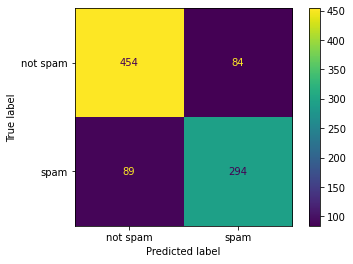

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       538
           1       0.78      0.77      0.77       383

    accuracy                           0.81       921
   macro avg       0.81      0.81      0.81       921
weighted avg       0.81      0.81      0.81       921



In [102]:
#splitting into test and train (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Training and Predictions
#  For text classification problems, the Multinomial Naive Bayes Classifier 

model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['80-20: Accuracy ', accuracy, 'Precision: ', metrics.precision_score(y_test, y_pred)])

print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['not spam', 'spam'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-294
* false negatives - 89
* true negatives - 454
* false positives - 84

minimising false positives is of more importance in spam detection because important emails can be missed when they are marked as spam. Precision of positive class is 0.778, and this should be improved.

### 70-30 split

Accuracy score:  0.8095582910934106
[[699 123]
 [140 419]]


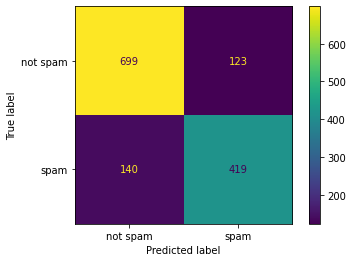

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       822
           1       0.77      0.75      0.76       559

    accuracy                           0.81      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.81      0.81      0.81      1381



In [103]:
#splitting into test and train (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Training and Predictions
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['70-30: Accuracy ', accuracy, 'Precision: ', metrics.precision_score(y_test, y_pred)])

print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['not spam', 'spam'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-419
* false negatives -140
* true negatives - 699
* false positives - 123

In [104]:
accuracies

[['80-20: Accuracy ', 0.8121606948968513, 'Precision: ', 0.7777777777777778],
 ['70-30: Accuracy ', 0.8095582910934106, 'Precision: ', 0.7730627306273062]]

The 80-20 train test split has higher accuracy (81.2%) and precision (77.8%) than the 70-30 split.

### 60-40 split

Accuracy score:  0.8098859315589354
[[952 145]
 [205 539]]


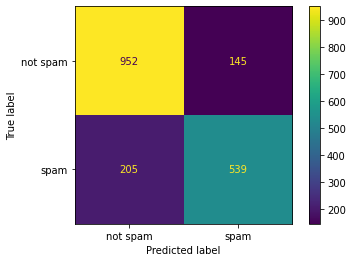

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1097
           1       0.79      0.72      0.75       744

    accuracy                           0.81      1841
   macro avg       0.81      0.80      0.80      1841
weighted avg       0.81      0.81      0.81      1841



In [105]:
#splitting into test and train (60-40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Training and Predictions
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['60-40: Accuracy ', accuracy, 'Precision: ', metrics.precision_score(y_test, y_pred)])

print('Accuracy score: ', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['not spam', 'spam'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

* true positives-539
* false negatives -205
* true negatives - 952
* false positives - 145

In [106]:
accuracies

[['80-20: Accuracy ', 0.8121606948968513, 'Precision: ', 0.7777777777777778],
 ['70-30: Accuracy ', 0.8095582910934106, 'Precision: ', 0.7730627306273062],
 ['60-40: Accuracy ', 0.8098859315589354, 'Precision: ', 0.7880116959064327]]

The 60-40 train-test split gave the second best accuracy, but the precision was the highest. Since in detecting spam minimising false positives is of more importance, this is the best model so far for this project.

### Optimization

Optimizing best model so far (60-40 train-test split - highest precision).

#### Smoothing

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [108]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'alpha': np.arange(1, 5, 0.5)}

nb = MultinomialNB()
#finding values
search = GridSearchCV(estimator=nb,param_grid=parameters,scoring='precision')
search.fit(X_train,y_train)
print(search.best_params_)

{'alpha': 1.0}


The grid search identified an alpha value of 1, which is the default that was used in the above models. The metric scores therefore remain the same.

In [109]:
accuracies

[['80-20: Accuracy ', 0.8121606948968513, 'Precision: ', 0.7777777777777778],
 ['70-30: Accuracy ', 0.8095582910934106, 'Precision: ', 0.7730627306273062],
 ['60-40: Accuracy ', 0.8098859315589354, 'Precision: ', 0.7880116959064327]]

#### More preprocessing (class imbalance)

In [110]:
#class imbalance present
df[57].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

##### Random undersampling majority class

Accuracy score:  0.8060836501901141
precision score:  0.7647058823529411
[[925 172]
 [185 559]]


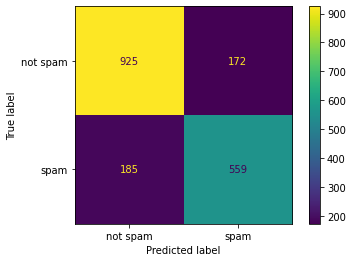

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1097
           1       0.76      0.75      0.76       744

    accuracy                           0.81      1841
   macro avg       0.80      0.80      0.80      1841
weighted avg       0.81      0.81      0.81      1841



In [111]:
#separating features and target
X = df.drop(columns=57)
y = df[57]


#splitting into test and train (60-40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

#random undersampling of the majority class in training set using imblearn's RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, replacement=True)
#subsets with undersampled version
x_rus, y_rus = rus.fit_resample(X_train, y_train)
# Training and Predictions


model = MultinomialNB().fit(x_rus, y_rus)

#predicting the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['60-40 undersampling: Accuracy ', accuracy, 'Precision: ', metrics.precision_score(y_test, y_pred)])

print('Accuracy score: ', accuracy)
print('precision score: ', metrics.precision_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['not spam', 'spam'])
plt.show()
print(metrics.classification_report(y_test, y_pred))

In [112]:
accuracies

[['80-20: Accuracy ', 0.8121606948968513, 'Precision: ', 0.7777777777777778],
 ['70-30: Accuracy ', 0.8095582910934106, 'Precision: ', 0.7730627306273062],
 ['60-40: Accuracy ', 0.8098859315589354, 'Precision: ', 0.7880116959064327],
 ['60-40 undersampling: Accuracy ',
  0.8060836501901141,
  'Precision: ',
  0.7647058823529411]]

With random undersampling of training set to combat class imbalance (60-40 split to establish train and test sets), the accuracy score, as well precision are lower than the other models.

##### Random oversampling of minority class

Accuracy score:  0.7832699619771863
precision score:  0.7525622254758418
[[928 169]
 [230 514]]


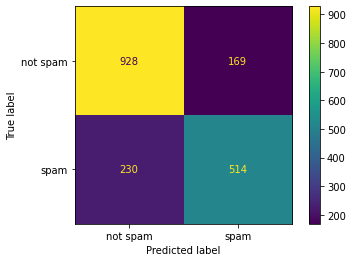

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1097
           1       0.75      0.69      0.72       744

    accuracy                           0.78      1841
   macro avg       0.78      0.77      0.77      1841
weighted avg       0.78      0.78      0.78      1841



In [113]:
#separating features and target
X = df.drop(columns=57)
y = df[57]


#splitting into test and train (60-40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)


#performing sampling technique on training set only, preserving integrity of the test set
#random oversampling of the minority class in training set using imblearn's RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
#subsets with oversampled version
x_ros, y_ros = ros.fit_resample(X_train, y_train)

#fitting the model
model = MultinomialNB().fit(x_ros, y_ros)

#predicting test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies.append(['60-40 random oversampling: Accuracy ', accuracy, 'Precision: ', metrics.precision_score(y_test, y_pred)])

print('Accuracy score: ', accuracy)
print('precision score: ', metrics.precision_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['not spam', 'spam'])
plt.show()
print(metrics.classification_report(y_test, y_pred))


In [114]:
accuracies

[['80-20: Accuracy ', 0.8121606948968513, 'Precision: ', 0.7777777777777778],
 ['70-30: Accuracy ', 0.8095582910934106, 'Precision: ', 0.7730627306273062],
 ['60-40: Accuracy ', 0.8098859315589354, 'Precision: ', 0.7880116959064327],
 ['60-40 undersampling: Accuracy ',
  0.8060836501901141,
  'Precision: ',
  0.7647058823529411],
 ['60-40 random oversampling: Accuracy ',
  0.7832699619771863,
  'Precision: ',
  0.7525622254758418]]

With random undersampling of training set to combat class imbalance (60-40 split to establish train and test sets), the accuracy and precision are lower than the previous models.

The best  naive-bayes model identified was therefore the third one-using a 60-40 split, default alpha of 1, and with no oversampling or undersampling (Accuracy - 0.8099, Precision - 0.7880).

## Conclusions and Recommendations

### Conclusion

The dataset was loaded, and cleaned, and univariate analysis carried out.

Cleaning/Preparation summary:

* No columns were dropped - all columns are necessary because they represent percentages/lengths important words and characteristics that will help in identifying spam
* Missing values were checked for and and none were found.
* Some duplicates were found and weren't dropped because it is possible for different emails to have the same general attributes that the columns represented.

These were the columns:
* 48  real attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

* 6 real attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

* 1 real attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

* 1  integer attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

* 1  integer attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

* 1 nominal class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

Modelling was then carried out. The major objective was achieved - creating a model able to determine whether or not an email is spam.



**Modelling**

Naive-Bayes Classifiers (multinomial) were used. Minimising false positives is of more importance in spam detection because important emails being marked as spam is more detrimental than spam finding its way to the primary inbox. Therefore, in this case, precision is an important metric to consider.

Initially, different ratios of train size:test size were used:

* 80-20: , Accuracy: 0.812, Precision: 0.778
* 70-30: , Accuracy: 0.8096, Precision: 0.773
* 60-40: , Accuracy: 0.8099, Precision: ', 0.788

**The 60-40 train-test split gave the second best accuracy, but the precision was the highest.** Since in detecting spam minimising false positives is of more importance, this is the best model so far for this project.

Using the train:test ratio of 60:40, various optimization techniques were tested to see if a model with precision > the 0.788 and greater accuracy could be identified:
* First, a grid search was used to identify the best value for the smoothing hyperparameter 'alpha'. The grid search identified an alpha value of 1, which is the default that was used in the previous models, so the evaluation metrics would not change.
* Next, random undersampling of majority class in training set was carried out. This resulted in an accuracy - 0.806 and precision - 0.765, which are lower than the other models.
* Finally, random oversampling of minority class in training set was carried out. This resulted in an accuracy - 0.783 and precision - 0.7525, which are lower than all other models.

**The best multinomial naive-bayes model identified was therefore the third one-using a 60-40 split, default alpha of 1, and with no oversampling or undersampling (Accuracy - 0.8099, Precision - 0.7880). It was the best because although it had the second best accuracy, the precision was the highest,and in spam detection precision is key.**

### Recommendation

Based on the analysis, for detecting spam, we would recommend using a 60-40 train-test split with default alpha of 1.

Out of all the models tested, although it had the second best accuracy, the precision was the highest,and in spam detection precision is key.

To optimize the model even further, we recommend exploring more preprocessing techniques, as well as feature selection.